In [1]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


# 資料預處理

In [2]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [3]:
import tensorflow.keras.utils as np_utils
import numpy as np

In [4]:
# from tensorflow.keras.datasets import mnist 
# (x_train_image,y_train_label),\
# (x_test_image,y_test_label)= mnist.load_data()

In [5]:
import cv2
import numpy as np

# 讀取圖片
images = []
for i in range(50):
    image_path = f'fix_img/{i}.jpg'
    image = cv2.imread(image_path, 0)
    images.append(image)

# 讀取標籤
labels = []
with open('new_label.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        label = line.strip()
        labels.append(label)

# 轉換成 NumPy 陣列
x_train_image = np.array(images)
y_train_label = np.array(labels)

# 檢查形狀
print("x_train_image shape:", x_train_image.shape)
print("y_train_label shape:", y_train_label.shape)

x_train_image shape: (50, 50, 140)
y_train_label shape: (50,)


In [6]:
import cv2
import numpy as np

# 讀取圖片
images = []
for i in range(50, 60):
    image_path = f'fix_img/{i}.jpg'
    image = cv2.imread(image_path, 0)
    images.append(image)

# 讀取標籤
labels = []
with open('new_label_test.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        label = line.strip()
        labels.append(label)

# 轉換成 NumPy 陣列
x_test_image = np.array(images)
y_test_label = np.array(labels)

# 檢查形狀
print("x_test_image shape:", x_test_image.shape)
print("y_test_label shape:", y_test_label.shape)

x_test_image shape: (10, 50, 140)
y_test_label shape: (10,)


In [7]:
encoding_dict = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18,
    'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27,
    'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35
}

decoding_dict = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I',
    19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R',
    28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'
}


In [8]:
y_train_label

array(['NH93', 'DT6V', 'RZ5H', '72Y6', 'WMDC', 'VY2D', '5RFN', '2WW9',
       '5GZT', 'PK3C', 'WMDN', 'F37G', 'KVMV', '43YK', '55N6', '943M',
       'WR55', 'W4HV', 'Z2Y2', 'GVTM', '7CYK', 'WK5Z', 'WMDC', 'YF27',
       'CDFW', 'Y6P3', 'ZTW4', 'GTG4', 'DK2H', '3793', 'VMDG', 'ZR5G',
       'GWWW', 'FN6V', '9WMR', '2TR3', 'R7NK', 'CWCG', 'G94C', 'Y44V',
       'MGMC', '6NFC', 'H2DK', 'RKRV', '4KHM', 'W6RP', '79MH', 'PNCN',
       '975M', 'FFC4'], dtype='<U4')

In [9]:
import numpy as np

# 將每個字符轉換為對應的編碼形式
y_train_encoded = [[encoding_dict[char] for char in label] for label in y_train_label]

# 印出轉換後的結果
print(y_train_encoded)

# 將編碼轉換為原始類別標籤
y_train_decoded = []
for label in y_train_encoded:
    decoded_label = ''.join([decoding_dict[code] for code in label])
    y_train_decoded.append(decoded_label)

# 印出轉換後的結果
print(y_train_decoded)

[[23, 17, 9, 3], [13, 29, 6, 31], [27, 35, 5, 17], [7, 2, 34, 6], [32, 22, 13, 12], [31, 34, 2, 13], [5, 27, 15, 23], [2, 32, 32, 9], [5, 16, 35, 29], [25, 20, 3, 12], [32, 22, 13, 23], [15, 3, 7, 16], [20, 31, 22, 31], [4, 3, 34, 20], [5, 5, 23, 6], [9, 4, 3, 22], [32, 27, 5, 5], [32, 4, 17, 31], [35, 2, 34, 2], [16, 31, 29, 22], [7, 12, 34, 20], [32, 20, 5, 35], [32, 22, 13, 12], [34, 15, 2, 7], [12, 13, 15, 32], [34, 6, 25, 3], [35, 29, 32, 4], [16, 29, 16, 4], [13, 20, 2, 17], [3, 7, 9, 3], [31, 22, 13, 16], [35, 27, 5, 16], [16, 32, 32, 32], [15, 23, 6, 31], [9, 32, 22, 27], [2, 29, 27, 3], [27, 7, 23, 20], [12, 32, 12, 16], [16, 9, 4, 12], [34, 4, 4, 31], [22, 16, 22, 12], [6, 23, 15, 12], [17, 2, 13, 20], [27, 20, 27, 31], [4, 20, 17, 22], [32, 6, 27, 25], [7, 9, 22, 17], [25, 23, 12, 23], [9, 7, 5, 22], [15, 15, 12, 4]]
['NH93', 'DT6V', 'RZ5H', '72Y6', 'WMDC', 'VY2D', '5RFN', '2WW9', '5GZT', 'PK3C', 'WMDN', 'F37G', 'KVMV', '43YK', '55N6', '943M', 'WR55', 'W4HV', 'Z2Y2', 'GVTM',

In [10]:
# 將每個字符轉換為對應的編碼形式
y_test_encoded = [[encoding_dict[char] for char in label] for label in y_test_label]

# 印出轉換後的結果
print(y_test_encoded)

# 將編碼轉換為原始類別標籤
y_test_decoded = []
for label in y_test_encoded:
    decoded_label = ''.join([decoding_dict[code] for code in label])
    y_test_decoded.append(decoded_label)

# 印出轉換後的結果
print(y_test_decoded)

[[35, 22, 32, 31], [7, 34, 29, 9], [15, 3, 7, 16], [6, 15, 27, 12], [20, 27, 35, 34], [16, 23, 20, 20], [12, 27, 4, 12], [23, 6, 22, 6], [15, 31, 22, 16], [9, 5, 2, 4]]
['ZMWV', '7YT9', 'F37G', '6FRC', 'KRZY', 'GNKK', 'CR4C', 'N6M6', 'FVMG', '9524']


In [11]:
x_train=x_train_image.reshape(-1,7000).astype('float32')
x_test=x_test_image.reshape(-1,7000).astype('float32')

In [12]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [13]:
# y_train_onehot = np_utils.to_categorical(y_train_label)
# y_test_onehot = np_utils.to_categorical(y_test_label)
import numpy as np


num_classes = np.max(y_train_encoded) + 1
print(num_classes)
# 進行 one-hot 編碼
y_train_onehot = np.eye(num_classes)[y_train_encoded]
print(y_train_onehot[0])

# 進行 one-hot 編碼
y_test_onehot = np.eye(num_classes)[y_test_encoded]
print(y_test_onehot[0])


36
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [14]:
print('Train feature:',x_train_normalize.shape)
print('Train label:',y_train_onehot.shape)

Train feature: (50, 7000)
Train label: (50, 4, 36)


In [15]:
print('Test feature:',x_test_normalize.shape)
print('Test label:',y_test_onehot.shape)

Test feature: (10, 7000)
Test label: (10, 4, 36)


# 建立模型

In [16]:
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Reshape

In [17]:
# class MLP_Model(tf.keras.Model):
#   def __init__(self):
#     super(MLP_Model, self).__init__(name='MLP')
#     self.h1_layer=Dense(7000,activation='relu') 
#     self.out_layer = Dense(4 * 36, activation='softmax')
#     self.out_layer = Reshape((4, 36))(self.out_layer)

#   def call(self, inputs):
#     h1=self.h1_layer(inputs)
#     y_predict=self.out_layer(h1)
#     return y_predict
class MLP_Model(tf.keras.Model):
  def __init__(self):
    super(MLP_Model, self).__init__()
    self.h1_layer = Dense(7000, activation='relu')
    self.out_layer = Dense(4 * 36, activation='softmax')

  def call(self, inputs):
    x = self.h1_layer(inputs)
    x = self.out_layer(x)
    x = Reshape((4, 36))(x)
    return x


In [18]:
model = MLP_Model()

In [19]:
model.build(input_shape=(None, 7000))

#查看模型摘要

In [20]:
model.summary()

Model: "mlp__model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  49007000  
                                                                 
 dense_1 (Dense)             multiple                  1008144   
                                                                 
Total params: 50015144 (190.79 MB)
Trainable params: 50015144 (190.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.call(tf.keras.layers.Input(shape=(7000)))

<KerasTensor: shape=(None, 4, 36) dtype=float32 (created by layer 'reshape')>

In [22]:
model.summary()

Model: "mlp__model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7000)              49007000  
                                                                 
 dense_1 (Dense)             (None, 144)               1008144   
                                                                 
Total params: 50015144 (190.79 MB)
Trainable params: 50015144 (190.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# 訓練模型

In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [25]:
import tensorflow
from tensorflow.keras.models import load_model

# try:
#     # 加載模型
#     model.load_weights('my_model.h5')
# except:
#     pass
# 重新訓練模型

In [26]:
train_history=model.fit(x=x_train_normalize,y=y_train_onehot,
       validation_split=0.2,batch_size=500,epochs=10,verbose=2)

Epoch 1/10
1/1 - 2s - loss: 3.9255 - acc: 0.0437 - val_loss: 14.7587 - val_acc: 0.0500 - 2s/epoch - 2s/step
Epoch 2/10
1/1 - 1s - loss: 10.8657 - acc: 0.1875 - val_loss: 14.9220 - val_acc: 0.0500 - 845ms/epoch - 845ms/step
Epoch 3/10
1/1 - 1s - loss: 11.3729 - acc: 0.2062 - val_loss: 14.6622 - val_acc: 0.0750 - 897ms/epoch - 897ms/step
Epoch 4/10
1/1 - 1s - loss: 11.7960 - acc: 0.2125 - val_loss: 14.9493 - val_acc: 0.0500 - 887ms/epoch - 887ms/step
Epoch 5/10
1/1 - 1s - loss: 11.9257 - acc: 0.1875 - val_loss: 15.8576 - val_acc: 0.0000e+00 - 893ms/epoch - 893ms/step
Epoch 6/10
1/1 - 1s - loss: 12.1831 - acc: 0.2000 - val_loss: 15.6999 - val_acc: 0.0000e+00 - 893ms/epoch - 893ms/step
Epoch 7/10
1/1 - 1s - loss: 12.2070 - acc: 0.2188 - val_loss: 15.4962 - val_acc: 0.0250 - 839ms/epoch - 839ms/step
Epoch 8/10
1/1 - 1s - loss: 12.0353 - acc: 0.2438 - val_loss: 15.5736 - val_acc: 0.0250 - 893ms/epoch - 893ms/step
Epoch 9/10
1/1 - 1s - loss: 11.6783 - acc: 0.2750 - val_loss: 15.6821 - val_acc

In [27]:
import os
import tensorflow as tf

save_path = r'C:\\Users\\Administrator\\Desktop\\影像處理圖片辨識\\model\\my_model'
save_path = r'C:\\Users\\Administrator\\Desktop\\影像處理圖片辨識\\model\\my_model.h5'
os.makedirs(save_path, exist_ok=True)  # 创建目录，如果目录已经存在则忽略

# 保存模型
model.save_weights("my_model.h5")

# 以圖形顯示訓練過程

In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

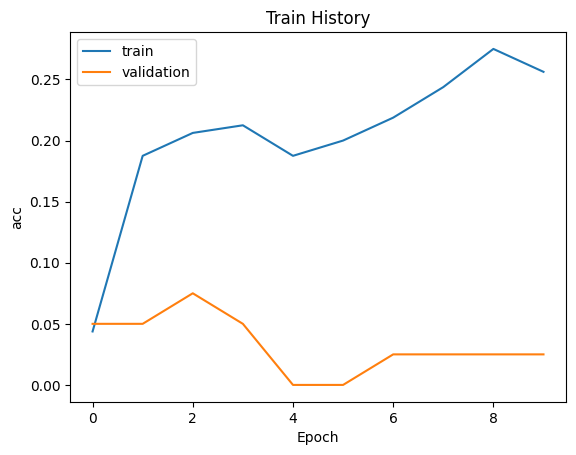

In [29]:
show_train_history(train_history,'acc','val_acc')

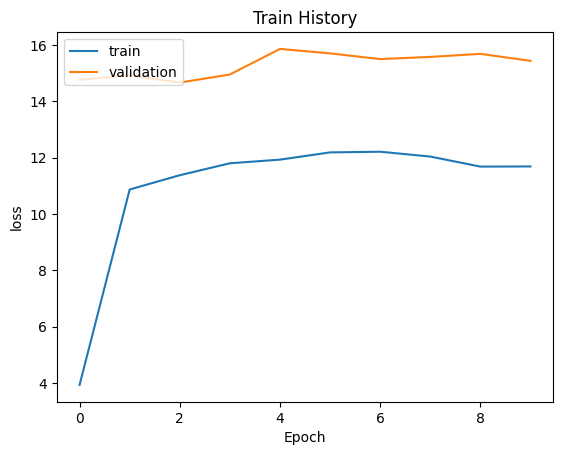

In [30]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [31]:
scores=model.evaluate(x_test_normalize,y_test_onehot,verbose=2)

1/1 - 0s - loss: 14.0817 - acc: 0.0500 - 47ms/epoch - 47ms/step


In [32]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 14.081700325012207 test_acc= 0.05000000074505806


In [65]:
scores=model.evaluate(x_train_normalize,y_train_onehot,verbose=2)

2/2 - 0s - loss: 12.3561 - acc: 0.2150 - 81ms/epoch - 40ms/step


In [66]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 12.356122970581055 test_acc= 0.2150000035762787


# 進行預測

In [33]:
probability = model.predict(x_test_normalize)

1/1 [==============================] - 0s 94ms/step


In [34]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [35]:
# 將編碼轉換為原始類別標籤
prediction_decoded = []
for label in prediction:
    decoded_label = ''.join([decoding_dict[code] for code in label])
    prediction_decoded.append(decoded_label)
prediction_decoded

['G463',
 'Y433',
 'G46G',
 'Y43K',
 'Y46K',
 'Y43K',
 'Y43K',
 'G43K',
 'Y43K',
 'Y43K']

In [36]:
y_test_label

array(['ZMWV', '7YT9', 'F37G', '6FRC', 'KRZY', 'GNKK', 'CR4C', 'N6M6',
       'FVMG', '9524'], dtype='<U4')

model.predict(x)詳細介紹

In [61]:
probability = model.predict(x_train_normalize)

2/2 [==============================] - 0s 26ms/step


In [62]:
probability.shape

(50, 4, 36)

In [63]:
prediction=tf.argmax(probability, axis=-1).numpy()
# 將編碼轉換為原始類別標籤
prediction_decoded = []
for label in prediction:
    decoded_label = ''.join([decoding_dict[code] for code in label])
    prediction_decoded.append(decoded_label)
prediction_decoded


['Y493',
 'GR63',
 'Y43K',
 'Y43K',
 'Y46C',
 'Y42K',
 'GRFK',
 'GRWG',
 'Y46K',
 'Y43K',
 'Y46K',
 'G46G',
 'Y46K',
 'G43K',
 'Y43K',
 'G43K',
 'GR63',
 'G433',
 'Y46K',
 'G43K',
 'Y43K',
 'G46K',
 'Y46C',
 'Y423',
 'G4F3',
 'Y463',
 'Y4W3',
 'G43K',
 'G423',
 'Y493',
 'Y43G',
 'GR3G',
 'G4WK',
 'Y46K',
 'G463',
 'Y493',
 'Y43K',
 'G46G',
 'G44C',
 'Y43K',
 'G43K',
 'Y43K',
 'Y43K',
 'Y43K',
 'G43K',
 'G433',
 'Y43K',
 'Y43K',
 'Y46K',
 'Y43K']

Y493:NH93


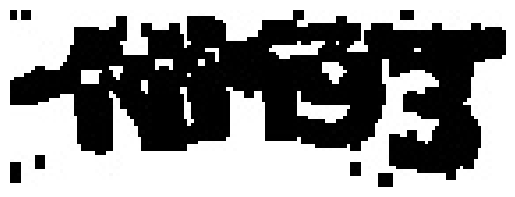

GR63:DT6V


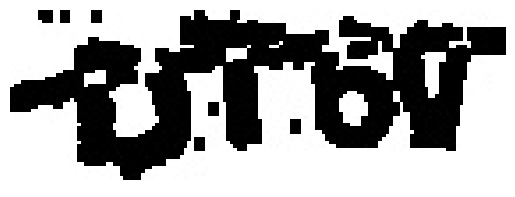

Y43K:RZ5H


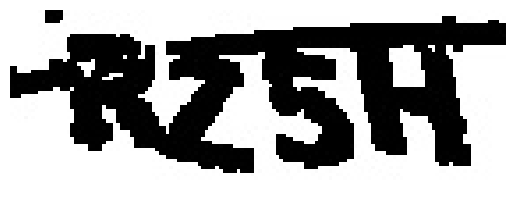

Y43K:72Y6


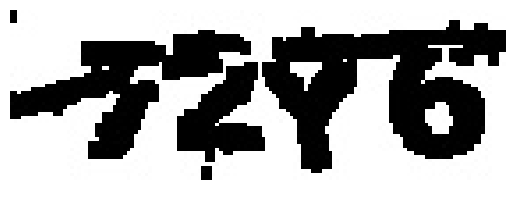

Y46C:WMDC


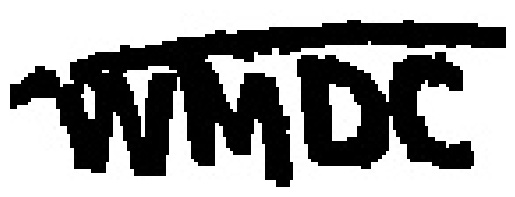

Y42K:VY2D


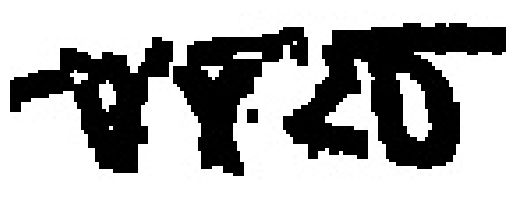

GRFK:5RFN


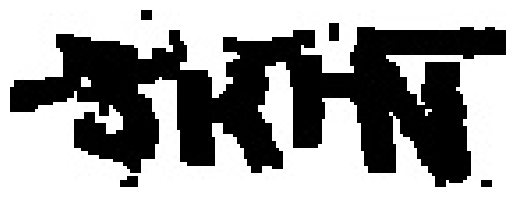

GRWG:2WW9


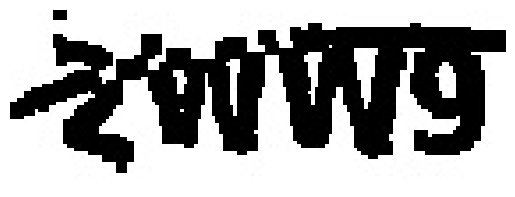

Y46K:5GZT


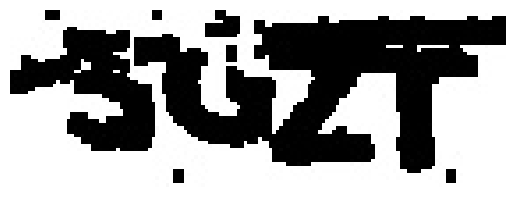

Y43K:PK3C


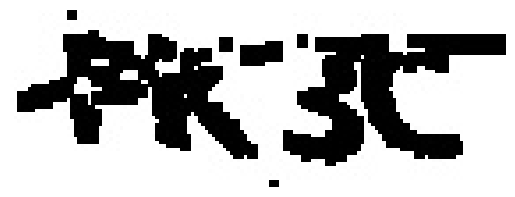

Y46K:WMDN


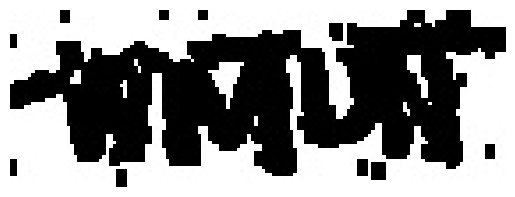

G46G:F37G


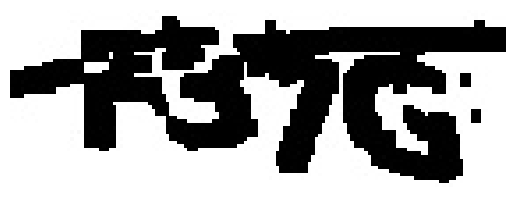

Y46K:KVMV


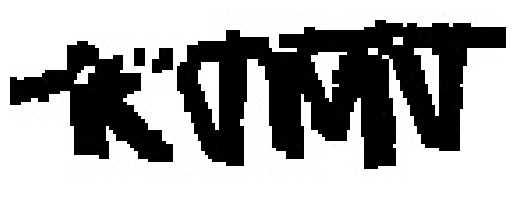

G43K:43YK


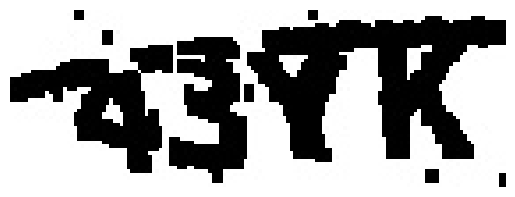

Y43K:55N6


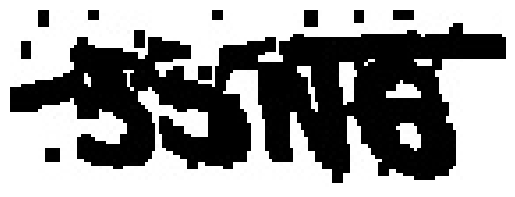

G43K:943M


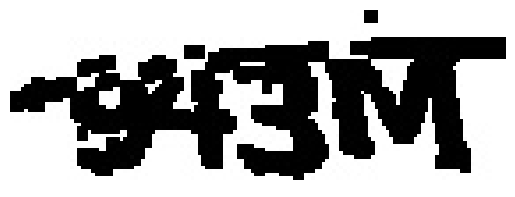

GR63:WR55


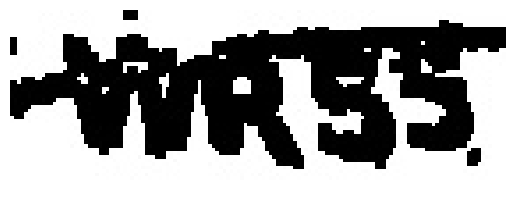

G433:W4HV


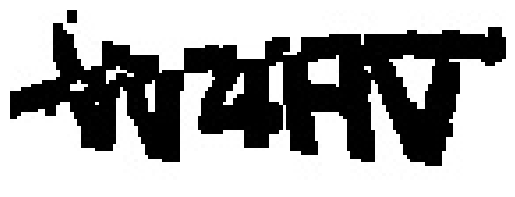

Y46K:Z2Y2


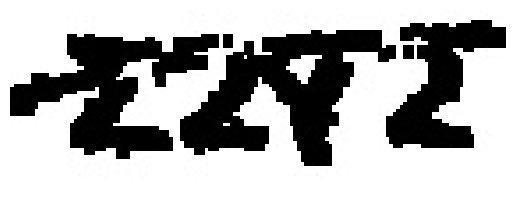

G43K:GVTM


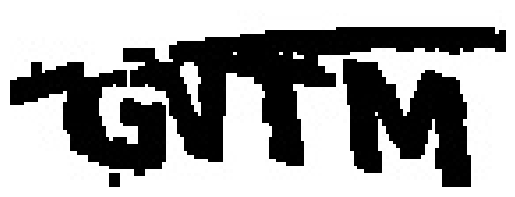

Y43K:7CYK


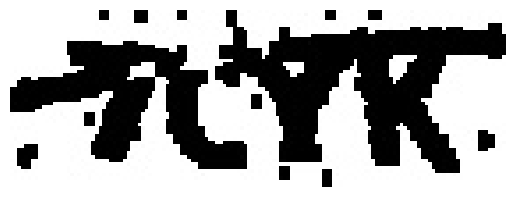

G46K:WK5Z


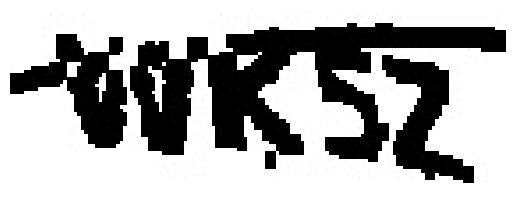

Y46C:WMDC


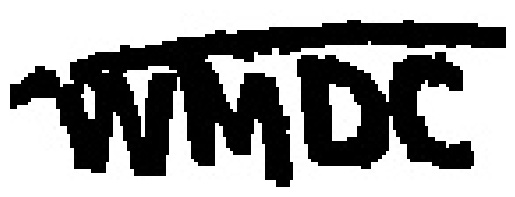

Y423:YF27


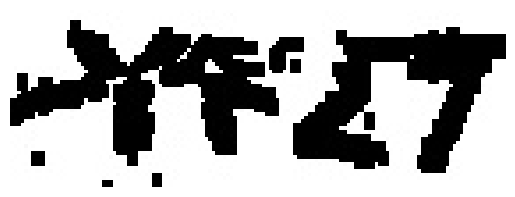

G4F3:CDFW


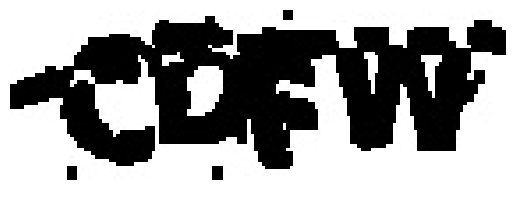

Y463:Y6P3


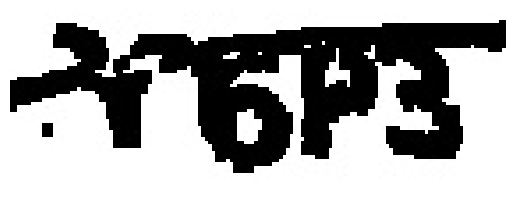

Y4W3:ZTW4


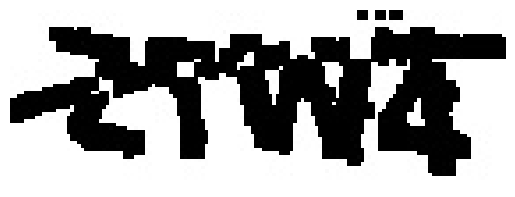

G43K:GTG4


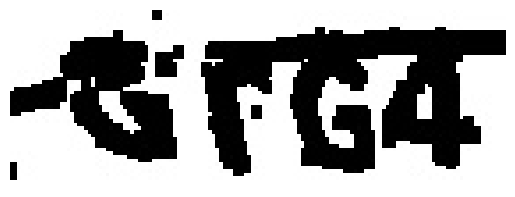

G423:DK2H


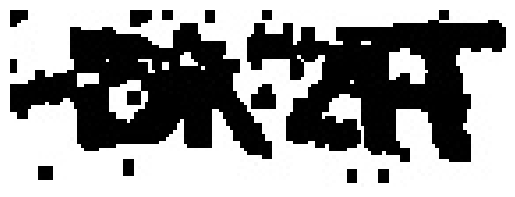

Y493:3793


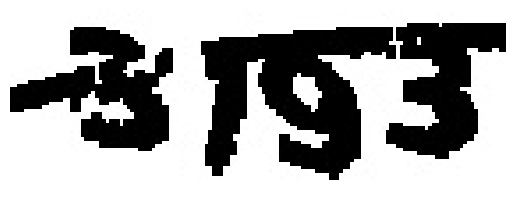

Y43G:VMDG


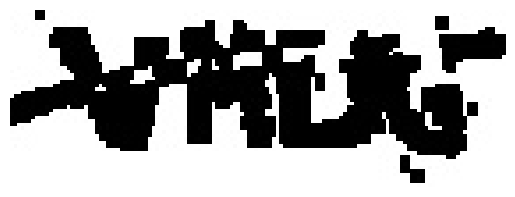

GR3G:ZR5G


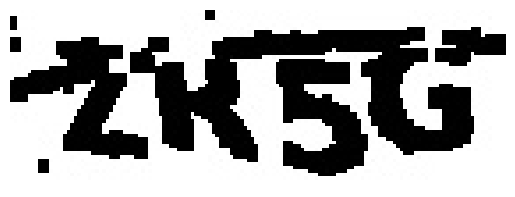

G4WK:GWWW


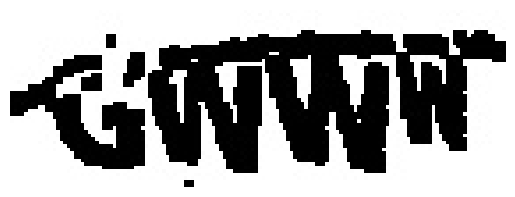

Y46K:FN6V


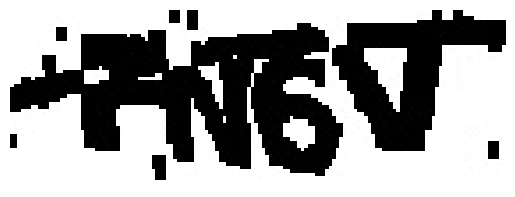

G463:9WMR


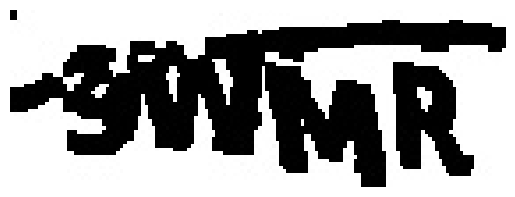

Y493:2TR3


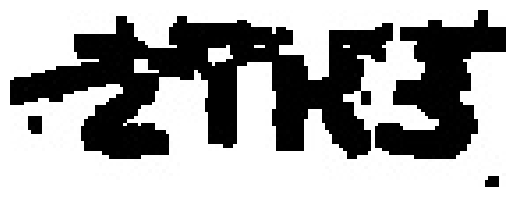

Y43K:R7NK


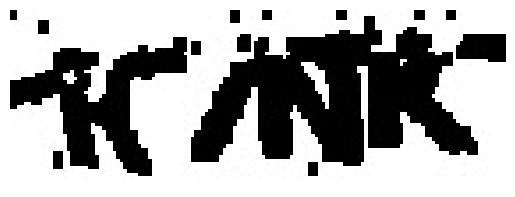

G46G:CWCG


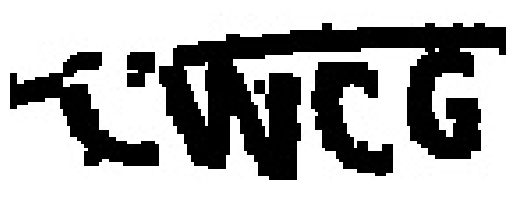

G44C:G94C


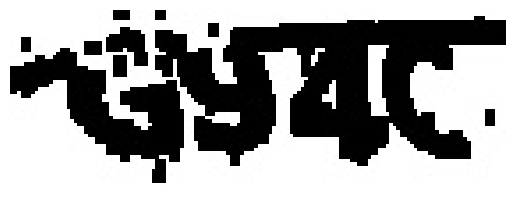

Y43K:Y44V


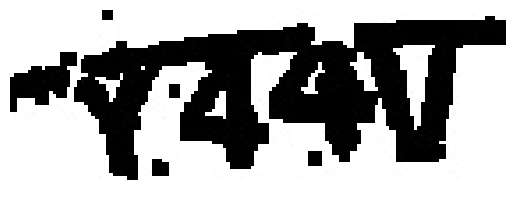

G43K:MGMC


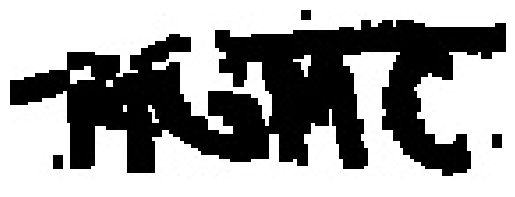

Y43K:6NFC


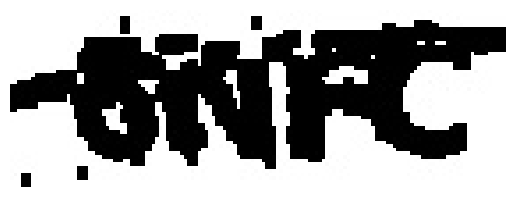

Y43K:H2DK


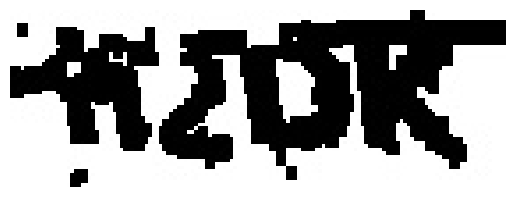

Y43K:RKRV


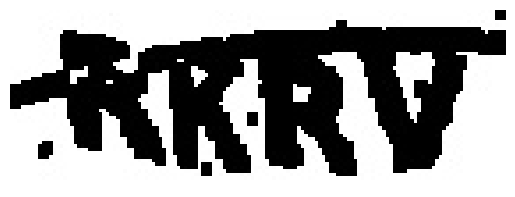

G43K:4KHM


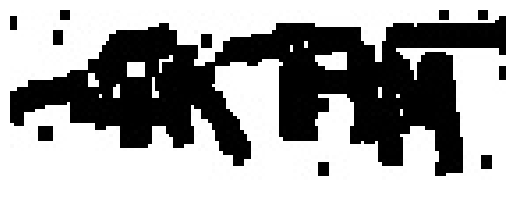

G433:W6RP


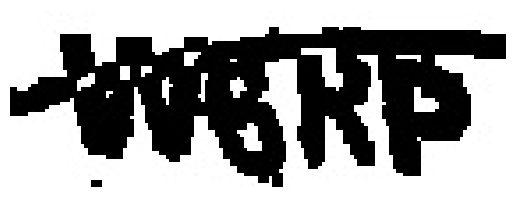

Y43K:79MH


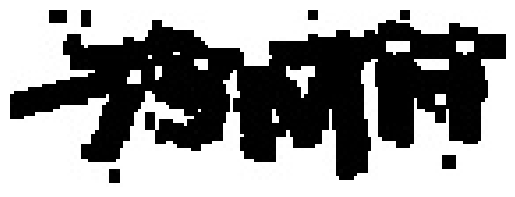

Y43K:PNCN


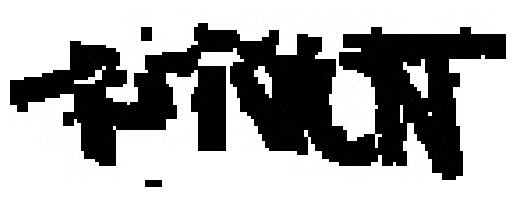

Y46K:975M


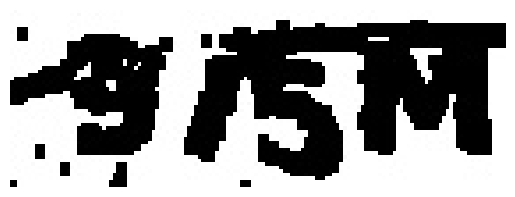

Y43K:FFC4


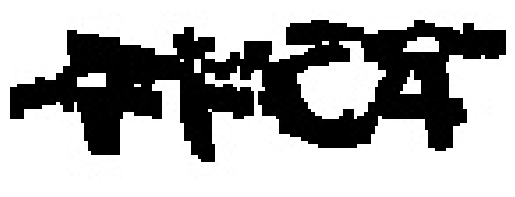

In [72]:
from PIL import Image
import numpy as np

for s in range(len(prediction_decoded)):
    if (prediction_decoded[s] != y_train_label[s]):
        # print(prediction_decoded[s] + ":" + y_train_label[s])
        print(prediction_decoded[s] + ":" + y_train_label[s])
        array = (x_train_image[s])
        # 转换为图像对象
        image = Image.fromarray(array.astype(np.uint8))
        # 显示图像
        plt.imshow(array, cmap='gray')
        plt.axis('off')
        plt.show()

In [49]:
prediction_decoded[0]

'Y493'

In [58]:
y_train_label[0]

'NH93'

#predict_class_probability

In [51]:
def predict_class_probability(model, x_feature):
  probability = model.predict(x_feature)
  prediction=tf.argmax(probability, axis=-1).numpy() 
  return prediction,probability

In [52]:
prediction,probability=predict_class_probability(model,x_test_normalize)

1/1 [==============================] - 0s 47ms/step


In [53]:
prediction

array([[16,  4,  6,  3],
       [34,  4,  3,  3],
       [16,  4,  6, 16],
       [34,  4,  3, 20],
       [34,  4,  6, 20],
       [34,  4,  3, 20],
       [34,  4,  3, 20],
       [16,  4,  3, 20],
       [34,  4,  3, 20],
       [34,  4,  3, 20]], dtype=int64)

In [54]:
probability[0]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.5578897e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 4.4211041e-02, 1.3346520e-38],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.0728402e-29,
        1.0131225e-13, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000

#顯示機率

In [55]:
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[0][i])) 

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
def show_predicted_probability(images,labels,
     prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',labels[idx])
  if len(labels)>0:print('predict:',prediction[idx])
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[idx][i])) 

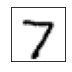

label: 7
predict: 7
0  Probability:0.000000071
1  Probability:0.000000008
2  Probability:0.000001918
3  Probability:0.000848763
4  Probability:0.000000000
5  Probability:0.000000099
6  Probability:0.000000000
7  Probability:0.999124587
8  Probability:0.000001421
9  Probability:0.000023063


In [ ]:
show_predicted_probability(x_test_image,y_test_label,
              prediction,probability,0)

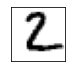

label: 2
predict: 2
0  Probability:0.000000021
1  Probability:0.000790528
2  Probability:0.999206483
3  Probability:0.000001673
4  Probability:0.000000000
5  Probability:0.000000249
6  Probability:0.000000156
7  Probability:0.000000000
8  Probability:0.000000989
9  Probability:0.000000000


In [ ]:
show_predicted_probability(x_test_image,y_test_label,
             prediction,probability,1)

In [ ]:
prediction=tf.argmax(probability, axis=1).numpy()

In [ ]:
prediction[0]

7

In [ ]:
prediction=tf.argmax(model.predict(x_test_normalize), axis=-1).numpy()

In [ ]:
# 將編碼轉換為原始類別標籤
prediction_decoded = []
for label in prediction:
    decoded_label = ''.join([decoding_dict[code] for code in label])
    prediction_decoded.append(decoded_label)

In [ ]:
prediction 

array([7, 2, 1, ..., 4, 5, 6])

#顯示預測結果

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

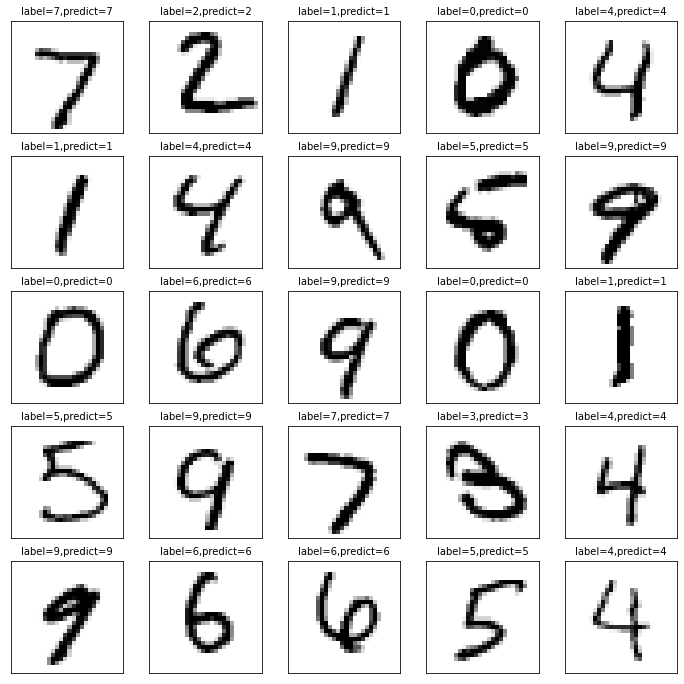

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,
               prediction,idx=0,num=25)

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [ ]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,967,1,1,0,3,1,4,1,1,1
1,0,1126,4,0,0,1,2,0,2,0
2,4,1,1009,1,1,1,2,10,3,0
3,0,0,2,985,0,5,1,6,5,6
4,0,0,3,0,961,0,4,1,0,13
5,1,0,0,3,1,876,6,1,3,1
6,4,4,0,1,1,4,944,0,0,0
7,0,5,9,2,1,1,0,1005,1,4
8,3,0,2,7,6,5,5,4,938,4


# 查看預測錯誤資料

In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2597,5,3


# 查看預測錯誤資料

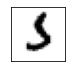

label: 5
predict: 3
0  Probability:0.000000539
1  Probability:0.007340222
2  Probability:0.000000325
3  Probability:0.792600751
4  Probability:0.000000101
5  Probability:0.199944317
6  Probability:0.000053214
7  Probability:0.000000238
8  Probability:0.000055058
9  Probability:0.000005254


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,340)

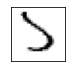

label: 5
predict: 3
0  Probability:0.000063639
1  Probability:0.004536862
2  Probability:0.000789568
3  Probability:0.966838837
4  Probability:0.000003638
5  Probability:0.020001512
6  Probability:0.001696490
7  Probability:0.005011705
8  Probability:0.000389106
9  Probability:0.000668609


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1393)